<h1> NFTs: Time Series Analysis of VeeFriends Project
<h3> Kelly Looman

<h2> What are NFTs? </h2>
   
- NFTs are non-fungible tokens (i.e., ERC-721). In plainer terms, NFTs are digital content that signify ownership over a one of a kind pieces of digital media, art, shoes, etc. 

<table><tr>
<td> <img src=".\Images\Bored_ape.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src=".\Images\Beeple.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src=".\Images\crypto_punk.jpeg" alt="Drawing" width="630px;"/> </td>
</tr></table>


In [63]:
import pandas as pd
from IPython.display import Image, HTML, display
import warnings
warnings.simplefilter("ignore")

# Plotting 
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from plotnine import * 
import plotnine 


import numpy as np 
from pandas.plotting import autocorrelation_plot
import statsmodels.tsa.stattools as sts 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [8]:
dta = pd.read_csv("./DATA/final_three_combined_df.csv", low_memory=False)

first and the most widely used token standard approved by the Ethereum blockchain network to run within the ecosystem 
ERC-20 is a fungible token used for identical entities, which is very useful for creating stablecoins (Tether, USDC and DAI are a few of the prime examples), ICO (Initial Coin Offering), etc. ERC20 tokens are fungible tokens, which means each of the tokens has the exact same value.


NFTs are unique tokens that cannot be replaced and have a different value from other tokens that are part of the same smart contract. If all the items in-game are tokenized, they become irreplaceable, and the value of some of the items will be more than the others, often according to their rarity, age and how appealing they are visually even though they are part of the same smart contract.



- NFTs rely on the Ethereum blockchain (though other crypto platforms are expanding into the NFT space) to record the ownership or transfer of ownership of a NFT. 

<table><tr>
<td> <img src=".\Images\Workflow.jpg" alt="Drawing" width= "900px"/> </td>
</tr></table>


- Problem: Blockchain is a decentralized and secure digital ledger of all transactions across a peer-to-peer network, but a lack of convenient data visualization prevents people from easily understanding what is going underneath the digital "hood."

- Goal: Develop and evaluate the performance and predictive power of a model trained and tested on data collected from NFT transactions in Etherscan.

<h2> Data </h2>

**Sampling Criteria:**
   - Familiarity 
   - Size

<table><tr>
<td> <img src=".\Images\Vee_Friends.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

**Transaction Types:**
    
- Normal: all transactions initiated by an EOA 
- Internal: not truly a transaction but an action intiated by a smart contract
- ERC-721 Token Transfer: transactions involving NFT token transfers 

<table><tr>
<td> <img src=".\Images\Transaction_workflow_1.jpg" alt="Drawing" width:"300px;"/> </td>
</tr></table>

- Comprehensive view of all transactions involving VFTs as well as all transactions of owners and sellers of VFTs including non-VFT tokens.

<table><tr>
<td> <img src=".\Images\Complete_data.jpg" alt="Drawing" width="725px;"/> </td>
</tr></table>

In [9]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455642 entries, 0 to 1455641
Data columns (total 71 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1455642 non-null  int64  
 1   blockNumber_x        1455642 non-null  int64  
 2   timeStamp_x          1455642 non-null  int64  
 3   hash                 1455642 non-null  object 
 4   nonce_x              1455641 non-null  float64
 5   blockHash_x          1455641 non-null  object 
 6   transactionIndex_x   1455642 non-null  int64  
 7   from_x               1455642 non-null  object 
 8   to_x                 1455312 non-null  object 
 9   value_x              1455642 non-null  object 
 10  gas_x                1455642 non-null  int64  
 11  gasPrice_x           1455642 non-null  int64  
 12  isError_x            1455642 non-null  int64  
 13  txreceipt_status     1454179 non-null  float64
 14  input_x              1455641 non-null  object 
 15

**Data Cleaning**

- 1.) Dropping (e.g., duplicates, nonces, & ids) 

- 2.) Renaming 

- 3.) Transforming 


<h2> Data Exploration

In [18]:
# NFT Project transactions 
other_nft_projects = dta['tokenSymbol_x'].value_counts().reset_index(name='counts')

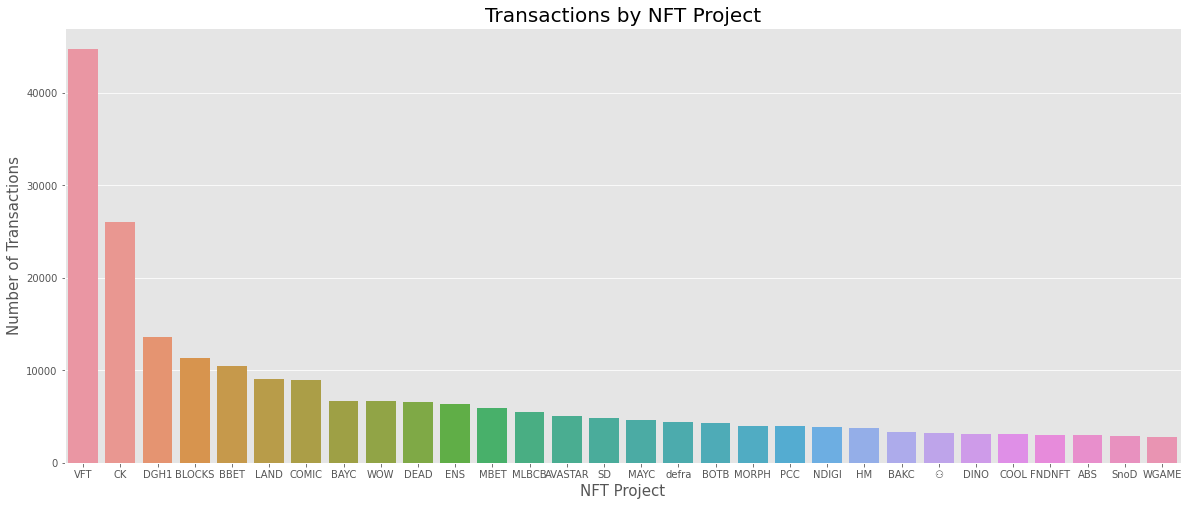

In [19]:
# Plot number of transactions across years 
fig, ax = plt.subplots(figsize =(20, 8))

y = sns.barplot(data=other_nft_projects[:30], x="index", y="counts")

# Title and labels 
plt.xlabel("NFT Project", size=15)
plt.ylabel("Number of Transactions", size=15)
plt.title("Transactions by NFT Project", size=20, y =1)

# Remove output text 
for txt in ax.texts:
    txt.set_visible(False)

In [13]:
# Drop columns 'transaction_y','traceID_x',

drop_dta = dta.drop(['Unnamed: 0', 'gasUsed', 'gas', 'type_y', 'input', 
                     'nonce_x', 'gas_y', 'timeStamp','tokenName_y','tokenSymbol_y', 
                     'tokenID_y', 'errCode_y','blockHash', 'traceId_y', 'gasPrice', 
                     'tokenDecimal_y', 'nonce', 'isError',  'confirmations', 
                     'cumulativeGasUsed', 'gasPrice', 'transactionIndex', 
                     'traceId_x', 'value_y','type_x', 'blockNumber', 
                     'transactionIndex_y', 'isError_y', 'errCode_x', 
                     'input_y', 'confirmations_y', 'gasUsed_y', 
                     'cumulativeGasUsed_y', 'gasPrice_y', 'txreceipt_status',
                     'contractAddress_x','tokenDecimal_x', 'confirmations_x', 
                     'isError_x', "blockNumber_y", "timeStamp_y", "nonce_y", 
                     "blockHash_y", 'transactionIndex_x'], axis=1)

# Rename columns
drop_dta = drop_dta.rename(columns={"blockNumber_x": "Normal_blockNumber ", 
                         "timeStamp_x": "Normal_timeStamp",
                         "hash": "Normal_hash",
                         "value_x": "Normal_value",
                         "gas_x": "Normal_gas",
                         "gasPrice_x": "Normal_gasPrice",
                         "from_x": "Normal_Buyer",
                         "to_x": "Normal_contract_seller",
                         "input_x": "Normal_inputfunction",
                         "cumulativeGasUsed_x": "Normal_cumulativeGas",
                         "gasUsed_x": "Normal_gasUsed",
                         "address_x": "Normal_address_called",
                         "apicall_x": "Normal_apicall",
                         "from_y": "NFTTX_seller",
                         "to_y": "NFTTX_buyer",
                         "contractAddress_y": "NFTTX_Address",
                         "tokenName_x": "NFTTX_Token_name",
                         "tokenID_x": "NFTTX_tokenid",
                         "tokenSymbol_x": "NFTTX_tokensymbol",
                         "address_y": "NFTTX_address_called",
                         "apicall_y": "NFTTX_apicall",
                         "from": "Internal_contract_buyer",
                         "to": "Internal_seller",
                         "value": "Internal_value",
                         "contractAddress": "Internal_contractAddress",
                         "address": "Internal_address_called",
                         "apicall": "Internal_apicall",})

# Convert time column from Unix to datetime
drop_dta['Normal_timeStamp'] = pd.to_datetime(drop_dta['Normal_timeStamp'], unit='s')
drop_dta['Normal_timeStamp'].describe()

# Specify year and month objects 
drop_dta['year'] = pd.DatetimeIndex(drop_dta['Normal_timeStamp']).year
drop_dta['month'] = pd.DatetimeIndex(drop_dta['Normal_timeStamp']).month

# Combine year and month columns; count and sort 
drop_dta['year_month'] = pd.to_datetime(drop_dta[['year', 'month']].assign(DAY=1))
year_month_day = drop_dta['year_month'].value_counts().sort_index()
year_month_day = pd.DataFrame(year_month_day)
year_month_day = year_month_day.reset_index()
year_month_day = year_month_day.rename(columns={"index": "date", "year_month": "count"})
year_month_day[52:]

veeFriends = drop_dta.loc[drop_dta['NFTTX_Address'] == '0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb']
# Specify year and month objects 
veeFriends['year'] = pd.DatetimeIndex(veeFriends['Normal_timeStamp']).year
veeFriends['month'] = pd.DatetimeIndex(veeFriends['Normal_timeStamp']).month
veeFriends['year_month'] = pd.to_datetime(veeFriends[['year', 'month']].assign(DAY=1))

veeFriends_date = veeFriends['year_month'].value_counts().sort_index()
veeFriends_date = pd.DataFrame(veeFriends_date)
veeFriends_date = veeFriends_date.reset_index()
veeFriends_date = veeFriends_date.rename(columns={"index": "date", "year_month": "count"})
vee_transactions = veeFriends_date.merge(year_month_day, left_on='date', right_on='date')
#vee_transactions

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

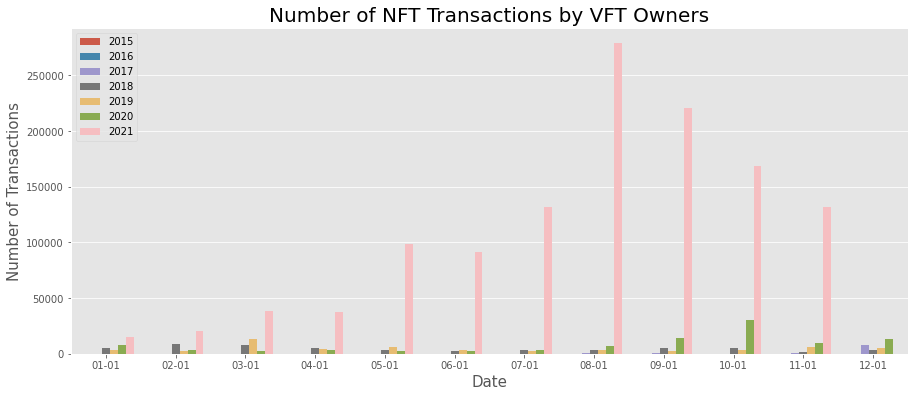

In [115]:
# Create year column 
year_month_day['year'] = pd.DatetimeIndex(year_month_day['date']).year

# Convert datetime to month_day
year_month_day['month_day'] = year_month_day['date'].apply(lambda x: x.strftime('%m-%d'))

# Sort values 
year_month_day = year_month_day.sort_values(by=['month_day'], ascending=True)
# Plot number of transactions across years 
fig, ax = plt.subplots(figsize =(15, 6))

y = sns.barplot(data=year_month_day, x="month_day", y="count", hue="year")

# Title and labels 
plt.xlabel("Date", size=15)
plt.ylabel("Number of Transactions", size=15)
plt.legend(loc='upper left')
plt.title("Number of NFT Transactions by VFT Owners", size=20, y =1)

# Remove output text 
for txt in ax.texts:
    txt.set_visible(False)

In [32]:
# Convert normal_value to float type 
drop_dta["Normal_value"] = drop_dta["Normal_value"].astype('float')
# Convert to standardized value 
drop_dta['Normal_value_normalized'] = (drop_dta['Normal_value'])/(10**18)

# Group by month-year
year_month = drop_dta['year_month'].value_counts()

# Find average, median, and total ether values 
average_ether = drop_dta.groupby('year_month')['Normal_value_normalized'].mean()
median_ether = drop_dta.groupby('year_month')['Normal_value_normalized'].median()
sum_ether = drop_dta.groupby('year_month')['Normal_value_normalized'].sum()

# Concat values 
ether = pd.concat([year_month, average_ether, median_ether, sum_ether], axis=1).reset_index()

# Rename columns 
ether.columns=['date', 'transactions', 'average', 'median', 'sum']

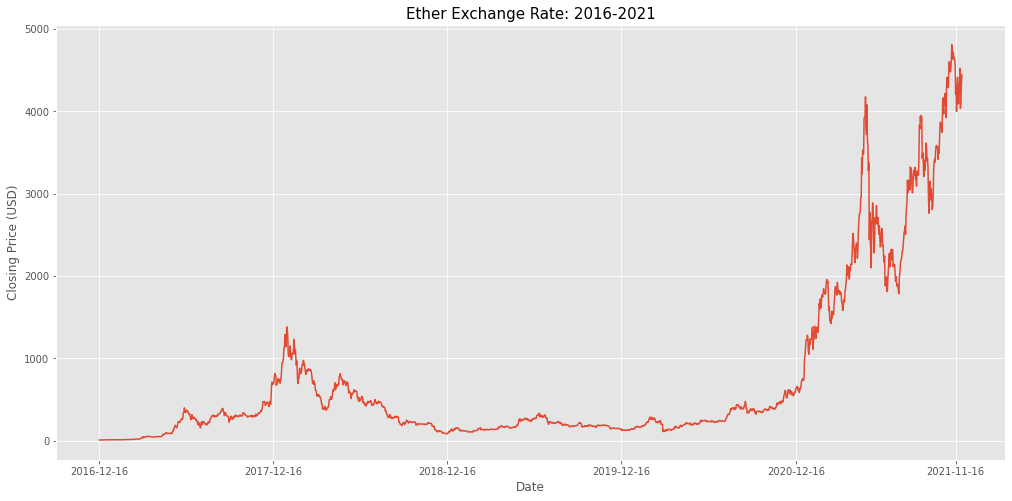

In [50]:
# Plot price of ether 
eth_USD = pd.read_csv("./DATA/ETH_price.csv")

fig, ax = plt.subplots(figsize =(17, 8))

y = sns.lineplot(data = eth_USD,
                           x = 'Date', 
                           y = 'Closing Price (USD)')
plt.setp(y, xticks=['2016-12-16', '2017-12-16', '2018-12-16', '2019-12-16', '2020-12-16' , '2021-11-16'])

plt.title("Ether Exchange Rate: 2016-2021", size=15, y =1)

# Remove output text 
for txt in ax.texts:
    txt.set_visible(False)

In [34]:

# Specify year and month objects 
eth_USD['year'] = pd.DatetimeIndex(eth_USD['Date']).year
eth_USD['month'] = pd.DatetimeIndex(eth_USD['Date']).month

# Create new date column by month 
eth_USD['year_month'] = pd.to_datetime(eth_USD[['year', 'month']].assign(DAY=1))

# Find mean of USD by month 
eth_price = eth_USD.groupby('year_month')['Closing Price (USD)'].mean()
eth_price = pd.DataFrame(eth_price).reset_index()

# Merge eth_usd with ether
ether_USD = ether.merge(eth_price, left_on='date', right_on='year_month')

# Calculate USD values of Ether transactions 
ether_USD['USD_value_average'] = ether_USD['average']*ether_USD['Closing Price (USD)']
ether_USD['USD_value_sum'] = ether_USD['sum']*ether_USD['Closing Price (USD)']


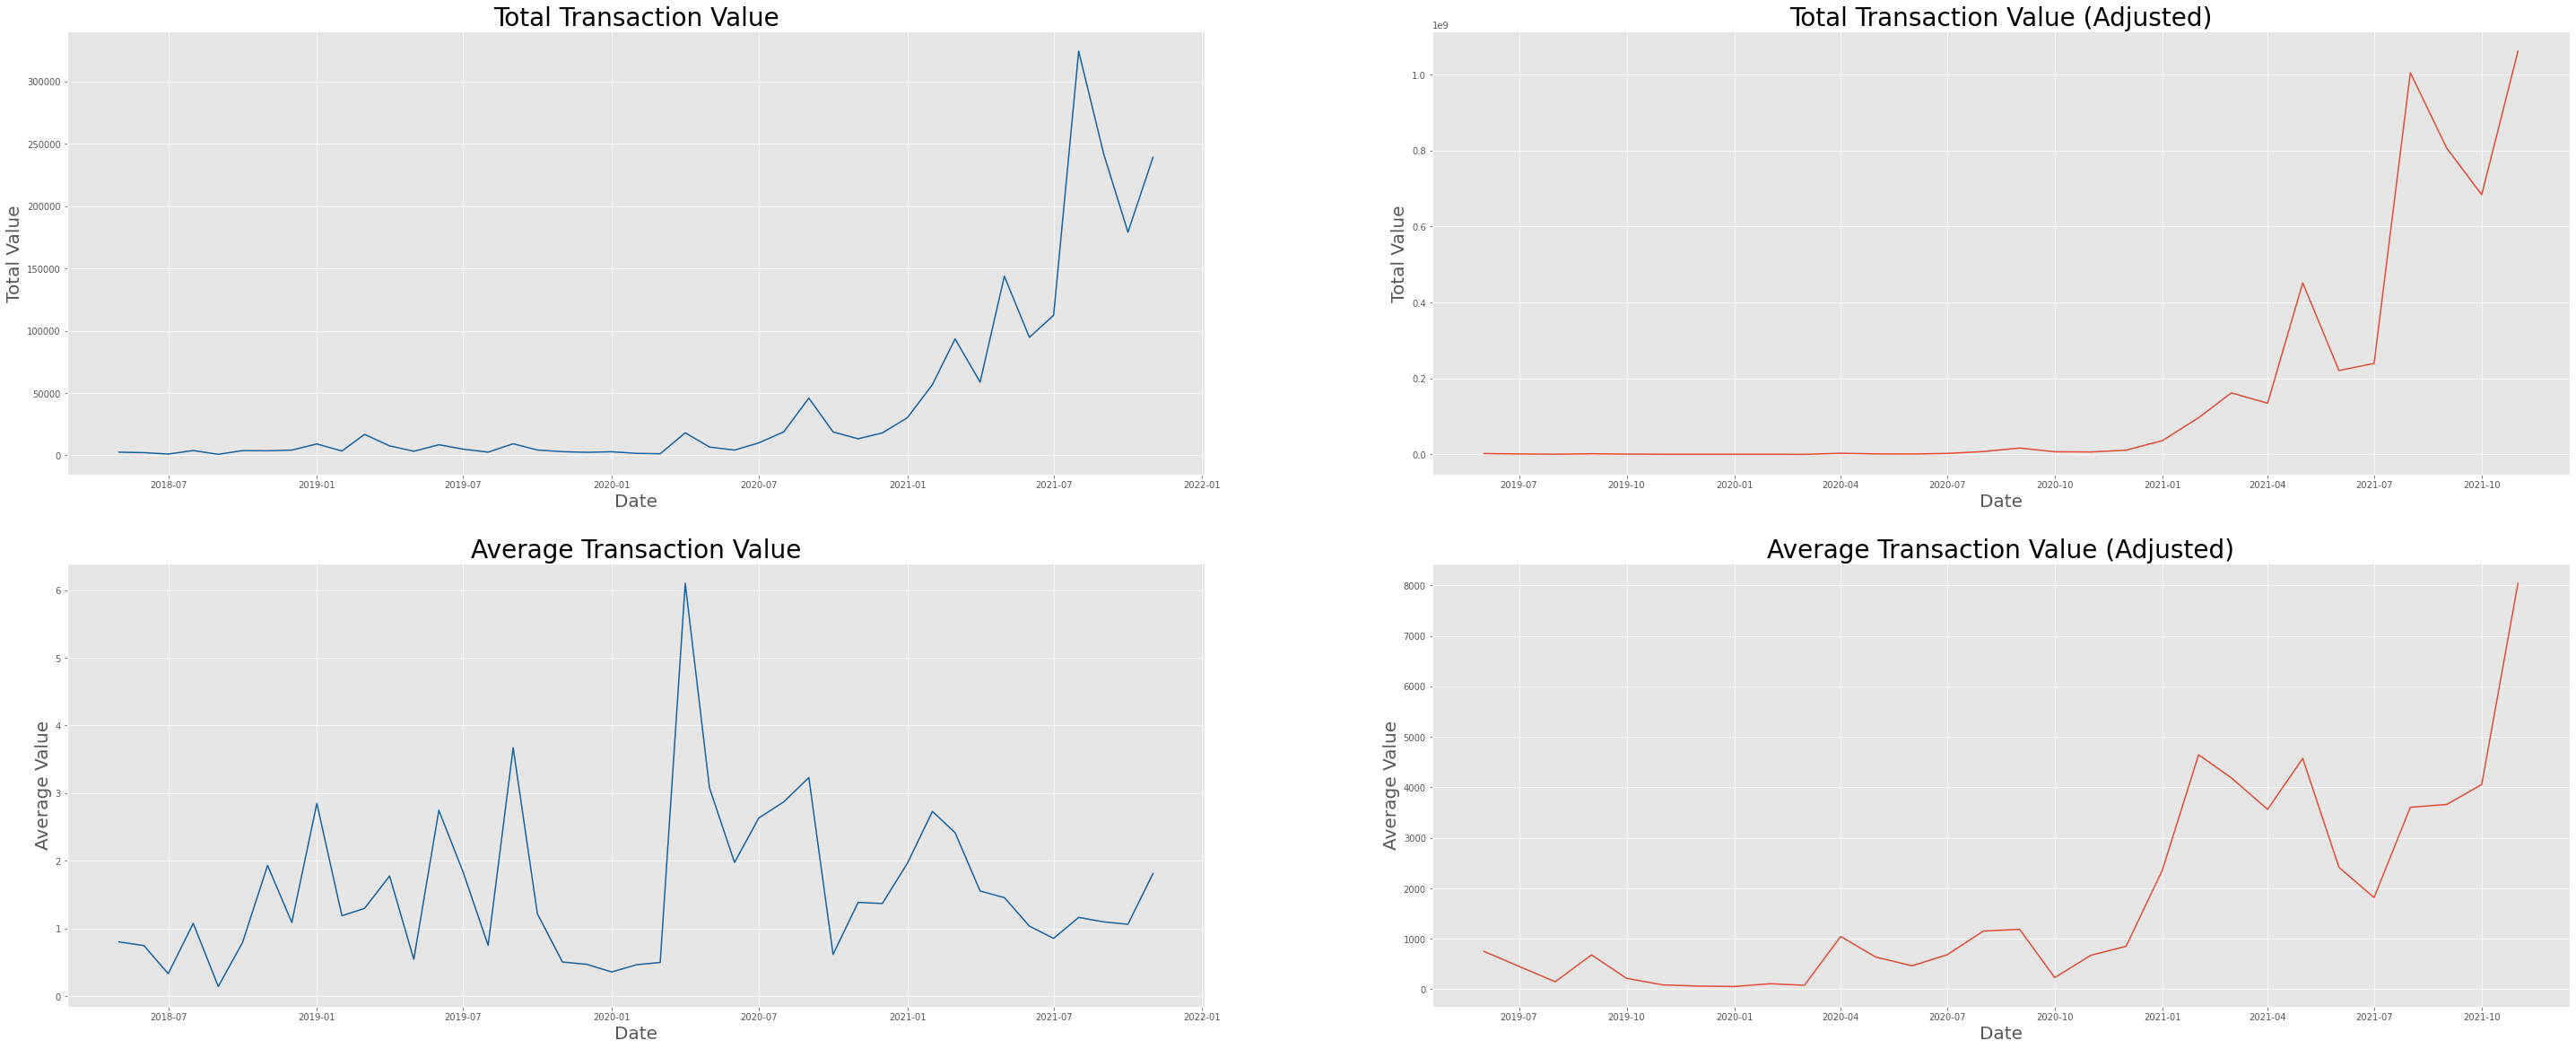

In [150]:
# Two subplots

#f, axes = plt.subplots(2, 4, figsize=(40, 20), sharex=True)
fig, axes = plt.subplots(2, 2, figsize=(50,20))

sns.lineplot(ax=axes[0, 0], data = ether[19:],
                           x = 'date', 
                           y = 'sum',
                           color = '#1261A0')
sns.lineplot(ax=axes[1, 0], data = ether[19:],
                           x = 'date', 
                           y = 'average', 
                           color = '#1261A0')
sns.lineplot(ax=axes[0, 1], data = ether_USD[29:],
                           x = 'date', 
                           y = 'USD_value_sum')
sns.lineplot(ax=axes[1, 1], data = ether_USD[29:],
                           x = 'date', 
                           y = 'USD_value_average')

axes[0,1].set_title('Total Transaction Value (Adjusted)', fontsize = 28)
axes[1,1].set_title('Average Transaction Value (Adjusted)', fontsize = 28)
axes[0,0].set_title('Total Transaction Value', fontsize = 28)
axes[1,0].set_title('Average Transaction Value', fontsize = 28)

axes[0,1].set_xlabel("Date", fontsize = 20)
axes[0,1].set_ylabel("Total Value", fontsize = 20)
axes[1,1].set_xlabel("Date", fontsize = 20)
axes[1,1].set_ylabel("Average Value", fontsize = 20)
axes[0,0].set_xlabel("Date", fontsize = 20)
axes[0,0].set_ylabel("Total Value", fontsize = 20)
axes[1,0].set_xlabel("Date", fontsize = 20)
axes[1,0].set_ylabel("Average Value", fontsize = 20)

plt.show()

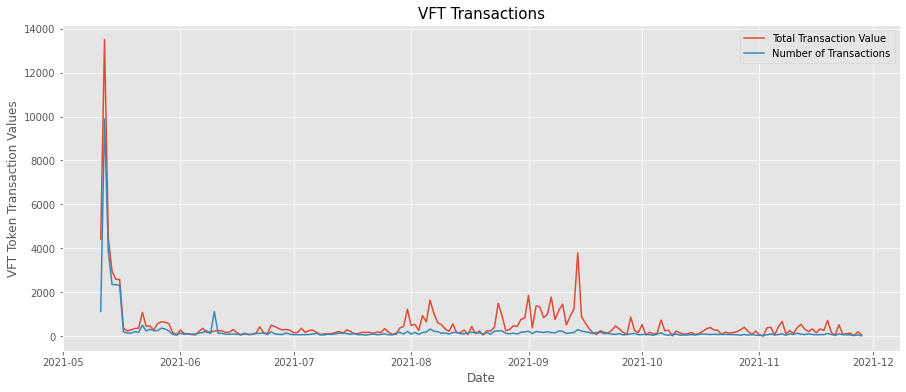

In [55]:
x = drop_dta[drop_dta['NFTTX_Token_name']== 'VeeFriends']
x['year'] = pd.DatetimeIndex(x['Normal_timeStamp']).year
x['month'] = pd.DatetimeIndex(x['Normal_timeStamp']).month
x['day'] = pd.DatetimeIndex(x['Normal_timeStamp']).day
x['year_month'] = pd.to_datetime(x[['year', 'month','day']])
z = x.groupby(['year_month']).agg({'Normal_value_normalized':sum}).reset_index()
a = x.groupby(['year_month']).size()
se = pd.Series(a)
z['count'] = se.values

# Plot 2021 number of transactions 
fig, ax = plt.subplots(figsize =(15, 6))

plt.plot(z['year_month'], z['Normal_value_normalized'], label="Total Transaction Value")
plt.plot(z['year_month'], z['count'], label = "Number of Transactions")

# Specify Title
plt.title("Number of NFT Transactions", size=15, y =1)

# Labeling 
plt.xlabel("Date", size=12)
plt.ylabel("VFT Token Transaction Values", size=12)
plt.title("VFT Transactions", size=15, y =1)
plt.legend()

# Remove output text 
for txt in ax.texts:
    txt.set_visible(False)
    

In [56]:
z = pd.read_csv("./DATA/z_file.csv")
z = z[8:] # Removing minting days 

<h2> Time Series Analysis </h2>
<h4> Confirm initial conditions are met: </h4>
<br>
    1.) White noise  <br>
    2.) Stationary <br>
    3.) Random Walk <br>
   

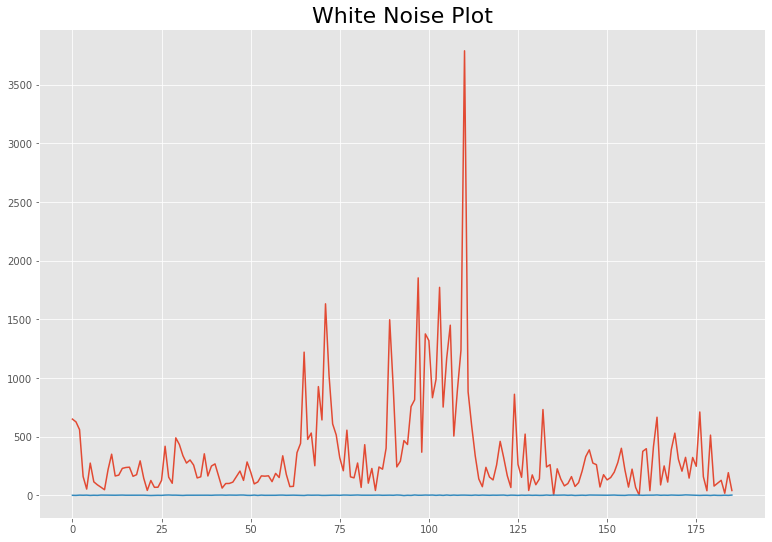

In [149]:
fig, ax = plt.subplots(figsize =(13, 9))

plt.plot(np.arange(len(z['Normal_value_normalized'])), z['Normal_value_normalized'])
plt.title("White Noise Plot", size=22, y =1)

white_noise = np.random.randn(186)

# Plot

plt.plot(np.arange(len(white_noise)), white_noise);

# Remove output text
for txt in ax.texts:
    txt.set_visible(False)

In [103]:
# Calculate Augmented Dicky Fuller test
print("ADF Test: ", sts.adfuller(z['Normal_value_normalized']))

# Calculate first order difference 
z['Normal_value_normalized_diff'] = z['Normal_value_normalized'].diff(periods=1)
z = z.dropna()

print()
# Calculate Augmented Dicky Fuller test for differentiated data 
print("ADF Test Diff: ", sts.adfuller(z['Normal_value_normalized_diff']))

print()
print("Test statistic") 
print("P-value")
print("Number of lags used")
print("1%, 5%, and 10% critical values")
print("Estimation of the maximized information criteria")

ADF Test:  (-2.453984057450617, 0.127075575353938, 6, 180, {'1%': -3.4672111510631, '5%': -2.877734766803841, '10%': -2.575403364197531}, 2518.0429119930077)

ADF Test Diff:  (-9.0440691296211, 5.0420069397729515e-15, 5, 180, {'1%': -3.4672111510631, '5%': -2.877734766803841, '10%': -2.575403364197531}, 2508.195877962435)

Test statistic
P-value
Number of lags used
1%, 5%, and 10% critical values
Estimation of the maximized information criteria


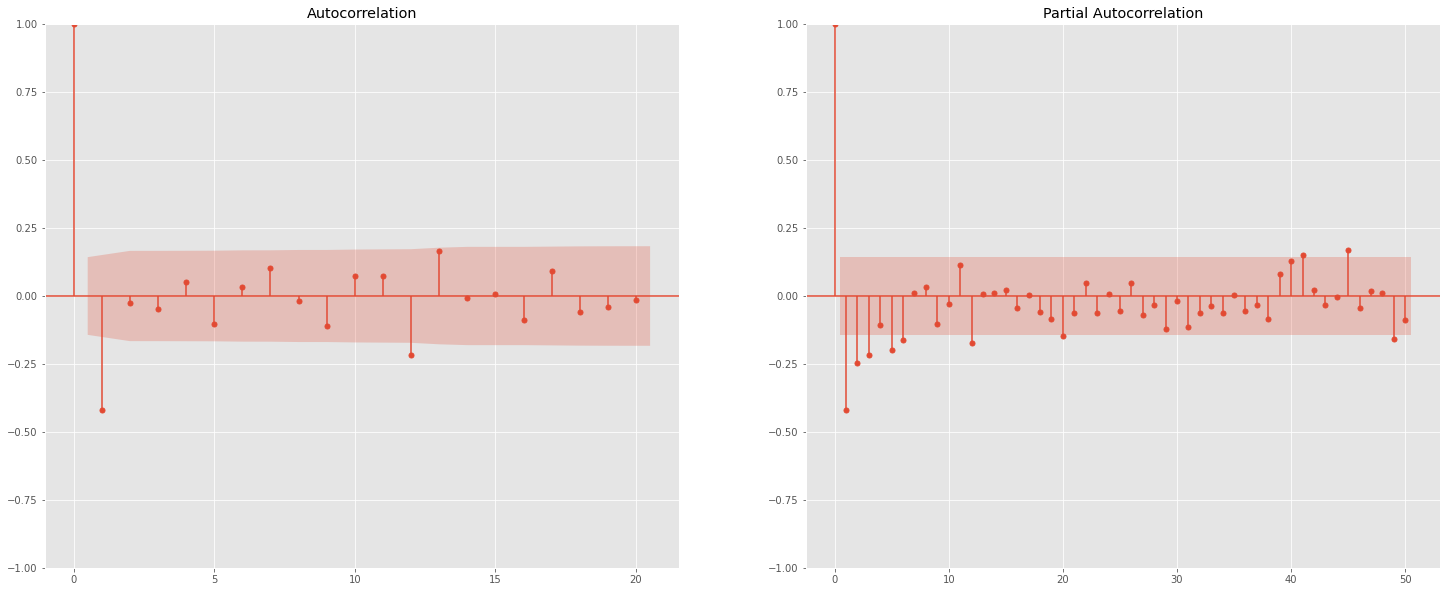

In [101]:
f, axes = plt.subplots(1,2, figsize=(25, 10))

plot_acf(z['Normal_value_normalized_diff'], lags=20, ax=axes[0]);
plot_pacf(z['Normal_value_normalized_diff'], lags=50, ax=axes[1]);

Given our autocorrelation and partial autocorrelation plots, I believe we will not have a very strong ARIMA model. Our data appears to have week autocorrelations (random walk), so in other words, our values seem to be dependent on chance rather than prior values. However, we will still conduct the ARIMA model to confirm that this is the case.

In [72]:
# Specify model 
p,d,q = 5,1,0
# p:lag order 
# d: hyperparameter (difference between obs)
# q: hyperparameter (time window for MA's residual error)
model = ARIMA(z['Normal_value_normalized_diff'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:     Normal_value_normalized_diff   No. Observations:                  193
Model:                           ARIMA(5, 1, 0)   Log Likelihood               -1439.120
Date:                          Fri, 03 Dec 2021   AIC                           2890.240
Time:                                  11:10:56   BIC                           2909.785
Sample:                                       0   HQIC                          2898.156
                                          - 193                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2427      0.035    -35.378      0.000      -1.312      -1.174
ar.L2         -1.1484      0.054    -21.100      0.

In [80]:
data = z['Normal_value_normalized'].values

In [81]:
train_size = int(len(data) * 0.66)
train, test = data[0:train_size], data[train_size:len(data)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,5))
    model_fit = model.fit()
    pred = model_fit.forecast()
    yhat = pred[0]
    predictions.append(yhat)
    # Append test observation into overall record
    obs = test[t]
    history.append(obs)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 218.261


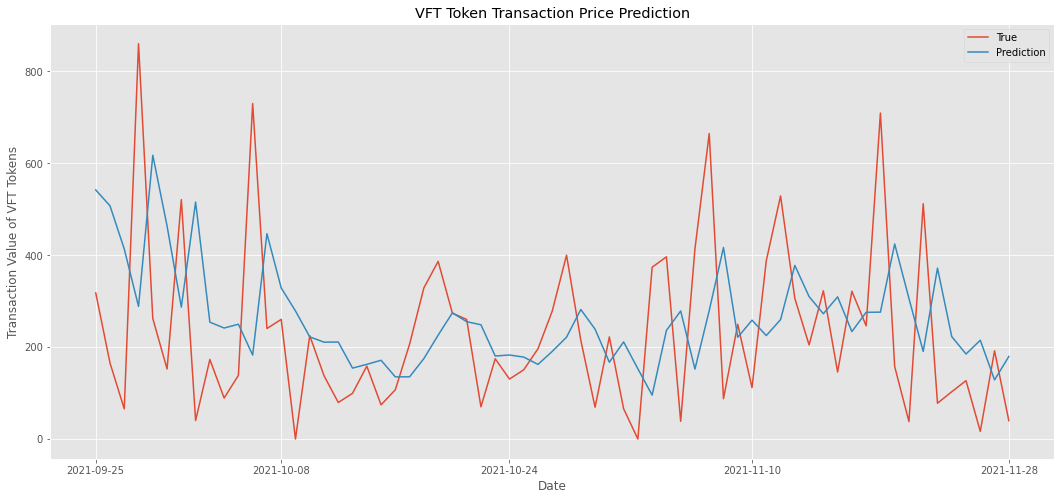

In [112]:
h = z[121:]
se = pd.Series(predictions)
h['predictions'] = se.values

# Plot 2021 number of transactions 
fig, ax = plt.subplots(figsize =(18, 8))

plt.plot(h['year_month'], h['Normal_value_normalized'], label="True")
plt.plot(h['year_month'], h['predictions'], label="Prediction")

# Specify Title
plt.title("", size=15, y =1)

# Labeling 
plt.xlabel("Date", size=12)
plt.ylabel("Transaction Value of VFT Tokens", size=12)
plt.title("VFT Token Transaction Price Prediction")
plt.xticks(['2021-09-25', '2021-10-08', '2021-10-24', '2021-11-10','2021-11-28'])
plt.legend()

# Remove output text 
for txt in ax.texts:
    txt.set_visible(False)

**Next Steps**
- Test additional models 
- Test additional data sets 
- Twitter Sentiment Analysis 

Notes: 
EOA initiates transaction (e.g., buying a NFT) => smart contract function is initiated; miners/verifies carry out smart contract functions; this includes transferring money => once verified; transaction is added to the Ethereum blockchain => buyer transfers token to seller (transfers happens almost simultaneously but verification can take time) 

Normal: all transactions initiated by an EOA (called by buyer) 
Internal: not truly a transaction but an action intiated by a smart contract (called by seller) 
Token Transfer: transactions involving NFT token (ERC-721) transfers (called by seller) 

Approaches: 
There are some suspect ways to get around Etherscan's blocks 
The legality of certain actions on the internet aren't always clear, but I did sign Etherscan's contract which includes a provision regarding scraping 
Limited in some sense of the direction I could go with the data that I was provided 

In [ ]:
# Plot 2021 number of transactions 
fig, ax = plt.subplots(figsize =(8, 6))
   
y = sns.lineplot(data = year_month_day[50:],
                           x = 'date', 
                           y = 'count',  
                           marker='o') 

# Labeling 
plt.xlabel("Date", size=15)
plt.ylabel("Number of Transactions", size=15)

# Specify xticks locations 
plt.setp(y, xticks=['2020-12-01', '2021-02-01', '2021-04-01', '2021-06-01', '2021-08-01', '2021-10-01', '2021-12-01'])

# Specify title
plt.title("Number of NFT Transactions by VFT Owners", size=20, y =1)

# Remove output text 
for txt in ax.texts:
    txt.set_visible(False)

In [ ]:
Extra Slides: 
    
# Read in data 
pd.set_option("display.max_columns",100)
dta = pd.read_csv("./DATA/final_three_combined_df.csv", low_memory=False)
dta.head()

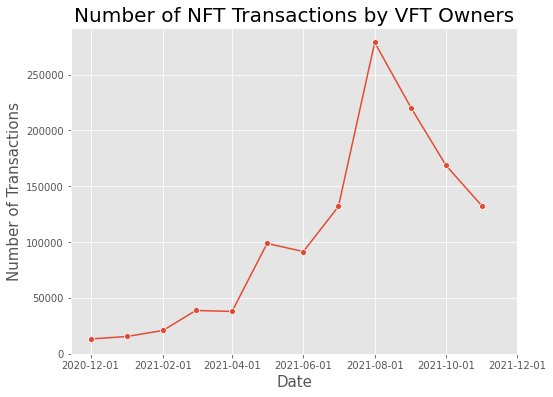

In [38]:
# Plot 2021 number of transactions 
fig, ax = plt.subplots(figsize =(8, 6))
   
y = sns.lineplot(data = year_month_day[50:],
                           x = 'date', 
                           y = 'count',  
                           marker='o') 

# Labeling 
plt.xlabel("Date", size=15)
plt.ylabel("Number of Transactions", size=15)

# Specify xticks locations 
plt.setp(y, xticks=['2020-12-01', '2021-02-01', '2021-04-01', '2021-06-01', '2021-08-01', '2021-10-01', '2021-12-01'])

# Specify title
plt.title("Number of NFT Transactions by VFT Owners", size=20, y =1)

# Remove output text 
for txt in ax.texts:
    txt.set_visible(False)

In [ ]:

# Two subplots
f, axes = plt.subplots(2,2, figsize=(20, 10))

sns.lineplot(data = ether_USD[10:],
                           x = 'year_month', 
                           y = 'USD_value_sum',
                           ax=axes[0])
sns.lineplot(data = ether_USD[10:],
                           x = 'date', 
                           y = 'USD_value_average',
                           ax=axes[1])

axes[0].set_title('Total Transaction Value')
axes[1].set_title('Average Transaction Value')

plt.show()
            

**Challenges**
- Data Acquisition (Available but not user friendly) 
    - Subject Matter 
    - Amount of data 

**Next Steps**
- Additional transformation of features
- Time Series Analysis 
- Turn code into a class 
- Twitter sentiment analysis 

In [ ]:

# Plot 2021 number of transactions 
fig, ax = plt.subplots(figsize =(15, 6))

plt.plot(vee_transactions['date'], vee_transactions['count_x'], label = "VFTs")
plt.plot(vee_transactions['date'], vee_transactions['count_y'], label = "non-VFTs")

# Specify Title
plt.title("Number of NFT Transactions by VFT Owners", size=15, y =1)

# Labeling 
plt.xlabel("Date", size=12)
plt.ylabel("Number of Transactions", size=12)
plt.legend()

# Remove output text 
for txt in ax.texts:
    txt.set_visible(False)

In [ ]:
Lack of accessibility to the dynamics of the NFT market and relevant data for investment
Inability to readily identify NFT assets that meet users’ needs